Spooky Author Identification

# Load data

In [13]:
# import libraries
import pandas as pd
import numpy as np

# to make this notebook's output stable across runs
np.random.seed(42)
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import re

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  

# set options for rendering plots
%matplotlib inline

# display multiple outputs within a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all";

import warnings
warnings.filterwarnings('ignore');

In [14]:
train = pd.read_csv("C:/Users/1394852/Desktop/ml_project/spooky_author/train.csv")
test = pd.read_csv("C:/Users/1394852/Desktop/ml_project/spooky_author/test.csv")

# Data exploration

In [15]:
train.head()
train.shape
train["author"].value_counts()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


(19579, 3)

EAP    7900
MWS    6044
HPL    5635
Name: author, dtype: int64

**Three Authors** <br>

Edgar Allen Poe <br>
Mary Wollstonecraft Shelley <br>
H.P Lovecraft

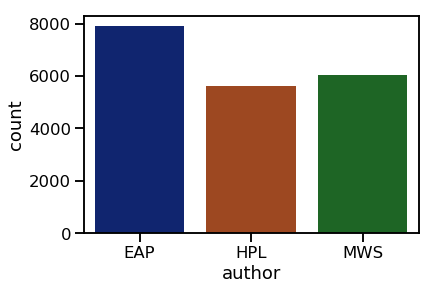

In [16]:
sns.countplot('author', data = train, palette='dark');

In [17]:
# look at some of the writing from edgar allen poe
train[train["author"] == "EAP"]["text"][0]

'This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.'

In [18]:
# add a rough count of words in the sentences as a feature
train['word_length'] = train.text.str.count(' ')
train.head()

,id,text,author,word_length
0,id26305,"This process, however, afforded me no means of...",EAP,40
1,id17569,It never once occurred to me that the fumbling...,HPL,13
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,35
3,id27763,How lovely is spring As we looked from Windsor...,MWS,33
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,26


In [19]:
# look at some of the writing from edgar allen poe
train[train["author"] == "EAP"]["word_length"].describe()

count    7900.000000
mean       24.442405
std        18.567706
min         1.000000
25%        11.000000
50%        20.000000
75%        32.000000
max       266.000000
Name: word_length, dtype: float64

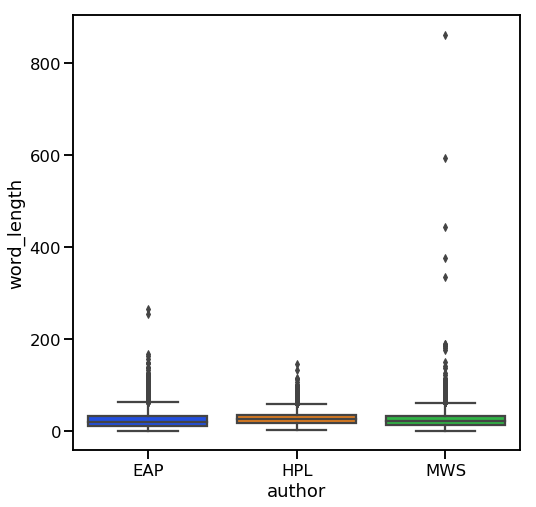

In [20]:
plt.figure(figsize=(8,8))
sns.boxplot(x="author", y="word_length", data=train, palette='bright');

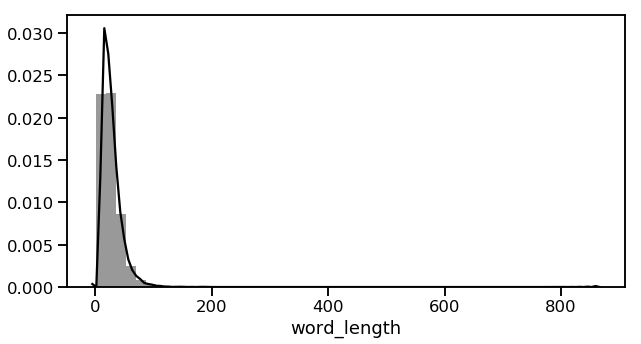

In [21]:
plt.figure(figsize=(10,5))
sns.set_context('talk')
sns.distplot(train['word_length'], color='black');

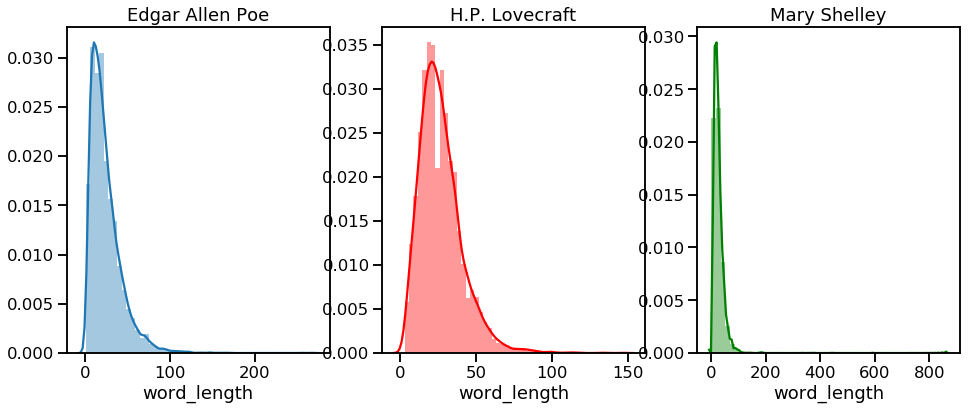

In [22]:
f,ax=plt.subplots(1,3,figsize=(16,6));
sns.distplot(train[train['author']=='EAP'].word_length,ax=ax[0]);
ax[0].set_title('Edgar Allen Poe');
sns.distplot(train[train['author']=='HPL'].word_length,ax=ax[1], color='r')
ax[1].set_title('H.P. Lovecraft');
sns.distplot(train[train['author']=='MWS'].word_length,ax=ax[2], color='g')
ax[2].set_title('Mary Shelley');
plt.show();

In [23]:
train[train["author"] == "HPL"]["word_length"].describe()

count    5635.000000
mean       26.799645
std        14.123252
min         3.000000
25%        17.000000
50%        25.000000
75%        34.000000
max       146.000000
Name: word_length, dtype: float64

In [24]:
train[train["author"] == "MWS"]["word_length"].describe()

count    6044.000000
mean       26.417273
std        23.134440
min         1.000000
25%        14.000000
50%        22.000000
75%        33.000000
max       860.000000
Name: word_length, dtype: float64

In [ ]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = str1

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show();

In [ ]:
import multidict

def getFrequencyDictForText(sentence):
    fullTermsDict = multidict.MultiDict()
    tmpDict = {}

    # making dict for counting frequencies
    for text in sentence.split(" "):
        if re.match("a|the|an|the|to|in|for|of|or|by|with|is|on|that|be", text):
            continue
        val = tmpDict.get(text, 0)
        tmpDict[text.lower()] = val + 1
    for key in tmpDict:
        fullTermsDict.add(key, tmpDict[key])
    return fullTermsDict

freq = getFrequencyDictForText(str1)
freq['this']